# Гипотезы
1. Объём торгов за последние 4 свечи влияет на изменение стоимости акций в краткосрочном периоде.
2. Предсказывать рост/падение акций можно на основании опережающих осцилляторв Stochastic и RSI. 
3. На основании изменения предыдущих 4 свеч ('change_all'), можно предсказывать изменение инструмента в краткосрочном периоде.


**Гипотеза 1** \
Н1: Объём торгов за последние 4 свечи влияет на изменение стоимости акций в краткосрочном периоде.

**Описание гипотезы**
Объём торгов часто рассматривается как показатель ликвидности. Высокий объём торгов может указывать на высокую ликвидность, что позволяет инвесторам быстрее и с меньшими затратами покупать и продавать акции. Это может влиять на цену акций, так как высоколиквидные активы могут быть менее подвержены резким колебаниям цен. Также объёмы используются многими трейдерами как индикатор технического анализа, поэтому интересно будет действительно ли объём влияет на изменение стоимости акций.

**Проверка гипотезы**

In [55]:
Volume_all=X['Volume0']+X['Volume1']+X['Volume2']+X['Volume3']

In [56]:
from scipy import stats
correlation, p_value = stats.pearsonr(Volume_all, X['target'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


Correlation coefficient: 0.024224347121929158
P-value: 1.1903402289678e-18


In [57]:
p_value<0.05

True

**Корелляция**: Значение коэффициента корреляции близко к 0, что указывает на очень слабую положительную линейную связь между объёмом торгов (Volume) и изменением цены акций (target).\
На практике, такое маленькое значение означает, что изменение объёма торгов почти не связано с изменением цены акций. Связь, хотя и положительная, является крайне слабой и практически несущественной.\
**P-value** Это чрезвычайно маленькое p-значение (значительно меньше уровня значимости 0.05), что указывает на статистически значимую корреляцию.\
Несмотря на статистическую значимость, практически влияние объёма торгов на изменение цены акций можно считать незначительным из-за очень низкого значения коэффициента корреляции. Это может указывать на то, что другие факторы могут играть более значительную роль в изменении цены акций.\
Посмотрим, ещё на графике взаимосвязь для полной картины:

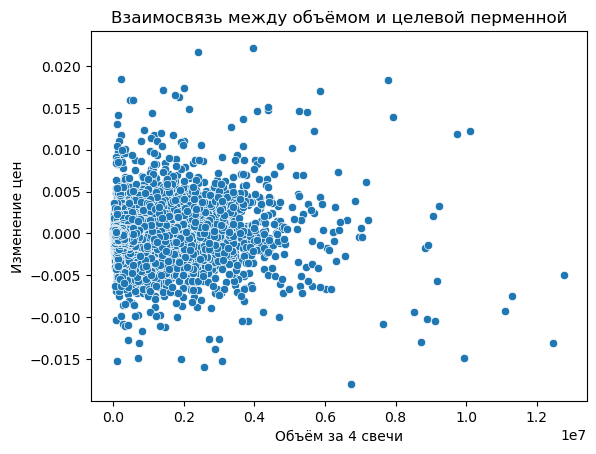

In [60]:
sns.scatterplot(x=Volume_all, y=X['target'])
plt.title('Взаимосвязь между объёмом и целевой перменной')
plt.xlabel('Объём за 4 свечи')
plt.ylabel('Изменение цен')
plt.show()

Проверим ещё на простейшем машинном обучении взаимосвязь между целевой перменной и объёмом

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(Volume_all.values.reshape(-1, 1), X['target'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)


R^2 Score: 0.0014938315207527753


**Итог:** Полученные результаты показывают, что существует статистически значимая, но крайне слабая положительная связь между объёмом торгов и изменением цены акций, плюс к этому объём торгов слабо не может достаточно хорошо объяснить вариацию в цене акций.
Это означает, что объём торгов не является значимым фактором изменений цены акций, несмотря на статистическую значимость этой связи. Гипотеза Н1 неверна.

**Гипотеза 2** \
Н1: Предсказывать рост/падение акций можно на основании опережающих осцилляторв Stochastic и RSI. 

**Описание гипотезы**
Опережающие осцилляторы, такие как Stochastic и RSI, широко используются для анализа ценовых графиков и предсказания будущего направления цен. Большинство трейдеров, которые успешно торгуют на техническом анализе признают важность данных индикаторв, также во время EDA мы заметили на графиках взаимосвязь, поэтому решили проверить её на практике.

**Проверка гипотезы**

In [70]:
correlation_rsi, p_value_rsi = stats.pearsonr(X['rsi0'], X['target'])
correlation_slowk, p_value_slowk = stats.pearsonr(X['slowk0'], X['target'])
print(f'Кореляция RSI и target')
print(f'Correlation coefficient: {correlation_rsi}')
print(f'P-value: {p_value_rsi}')
print(f'Кореляция Stochastic и target')
print(f'Correlation coefficient: {correlation_slowk}')
print(f'P-value: {p_value_slowk}')

Кореляция RSI и target
Correlation coefficient: 0.41226680563975454
P-value: 0.0
Кореляция Stochastic и target
Correlation coefficient: 0.425763564299215
P-value: 0.0


**RSI и target:**
Коэффициент корреляции между RSI и target составляет 0.412, что указывает на умеренную положительную связь между этими двумя переменными.
P-value, близкое к нулю, указывает на то, что нулевая гипотеза о том, что корреляция равна нулю, отвергается на уровне значимости 0.05, прям формулировка в экзамене по анализу данных.

**Stochastic и target:**
Коэффициент корреляции между Stochastic и target составляет 0.426, что также указывает на умеренную положительную связь между этими двумя переменными.
P-value также близко к нулю, что означает отвержение нулевой гипотезы о том, что корреляция равна нулю, на уровне значимости 0.05. 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X[['slowk0','rsi0']], X['target'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.19879743437112873



**Вывод**:
Результаты подтверждают гипотезу о том, что опережающие осцилляторы, такие как RSI и Stochastic, могут быть полезными инструментами для предсказания движения цен на акции. Модель имеет некоторую способность к предсказанию движения цен на акции на основе признаков - индикаторов теханализа, но она объясняет только небольшую часть общей вариации цены.

**Гипотеза 3**\
Н1: На основании изменения предыдущих 4 свеч, можно предсказывать изменение инструмента в краткосрочном периоде.

**Описание** \
Ценовое изменение акций может говорить о будущей стоимости акций, это так называемое явление как краткосрочный тренд. Есть множество разных стратегий основанных на тренде, если тренд нисходящий, то акция склонна ближе к падению, если восходящий, то близка к росту. Интересно будет проверить в целом есть ли корелляция тренда с изменением стоимости акций.

In [80]:
from scipy import stats
correlation, p_value = stats.pearsonr(X['change_all'], X['target'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Correlation coefficient: 0.7363321612007917
P-value: 0.0


**Корелляция**:
Значение 0.736 указывает на сильную положительную корреляцию между переменными. Это означает, что существует значительная связь между изменениями в предыдущих 4 свечах и изменениями в краткосрочном периоде. Если одна переменная увеличивается, другая также, скорее всего, увеличится, что поддерживает идею предсказания на основе исторических данных.\
**Pvalue**:
начение P-value равно очень близко к нулю, что означает, что корреляция статистически значима, её случайное возникновение маловероятно.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X['change_all'].values.reshape(-1, 1), X['target'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.5523133077147753


**Итог**: Из всех предложенных гипотез, влияние тренда на изменение цен акций является самой правдоподобной, однако хотелось бы иметь модель, которая бы объясняла бы большую часть дисперсий и имела бы низкую ошибку. Для этого необходимо обучить модель на большем количестве признаков, предварительно проведя как машстабирование данных, так и one-hot-encoding. Этим мы и будем заниматься в блоке **Машинное обучение**